<a href="https://colab.research.google.com/github/flash-berry/MachineLearning/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В лабораторной работе выполнены все основные и дополнительные пункты:

*    Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте kaggle, UCI репозитория, Google Dataset Search и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
*   Считать данные и вывести их основные характеристики, описание признаков.
*   Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
*   (+2 балла) Произвести чистку данных (Data Cleaning). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
*   Провести анализ признаков, используя визуализацию (hist(), boxplot(), countplot(), barplot() и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
*   (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
*   (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (Feature Engineering).

Текущий датасет может быть интересен для задачи регресии

Где нужно предсказать цену дома по входным данным

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%precision %.4f

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
df.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Предварительно удалим очевидно избыточные и ненужные для данной задачи признаки:

Признак Address имеет избыточную информацию (13580 разных адресов), которую вполне может нести признак Suburb, вместо того чтобы смотреть на каждое конкретное здание, модель будет ориентироваться на район или застроку из домов, которые можно выделить как благополучные или нет и т.д.

Признак Method: не имеет значение каким способом был приобретена недвижимость будь то аукцион, продажа имущества или подробности сделки скрыты, если задача касается оценки её цены. Важны внутренние и внешние факторы, касающиеся недвижимости, а не детали процедуры покупки.

Из похожих рассуждений стоит удалить признаки SellerG, Postcode, CouncilArea, Lattitude, Longtitude

Но признаки SellerG и Method ещё пригодяться для анализа, поэтому удалим их позже

In [ ]:
df.drop(['Postcode','CouncilArea','Lattitude','Longtitude','Address'], axis=1, inplace=True)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0
3,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,Barry,26/08/2017,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0
13576,Williamstown,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0
13577,Williamstown,3,h,1170000.0,S,Raine,26/08/2017,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0
13578,Williamstown,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0


Рассмотрим признак Date

Для этого создадим признак Dataperiod, разделив всё время на периоды по полгода и посмотрим на среднюю цену недвижимости

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
earliest_date = df['Date'].min()
latest_date = df['Date'].max()
iter = 0

df['Dataperiod'] = 0
while earliest_date < latest_date:
  df.loc[(df['Date'] >= earliest_date) & (df['Date'] < earliest_date + pd.DateOffset(months=6)), 'Dataperiod'] = iter
  iter = iter + 1
  earliest_date = earliest_date + pd.DateOffset(months=6)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,h,1480000.0,S,Biggin,2016-12-03,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,1
1,Abbotsford,2,h,1035000.0,S,Biggin,2016-02-04,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,0
2,Abbotsford,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,2
3,Abbotsford,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,2
4,Abbotsford,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,Barry,2017-08-26,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0,3
13577,Williamstown,3,h,1170000.0,S,Raine,2017-08-26,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0,3
13578,Williamstown,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0,3


In [ ]:
df['Dataperiod'].value_counts()

,count
Dataperiod,
2,5149
1,4085
0,2251
3,2095


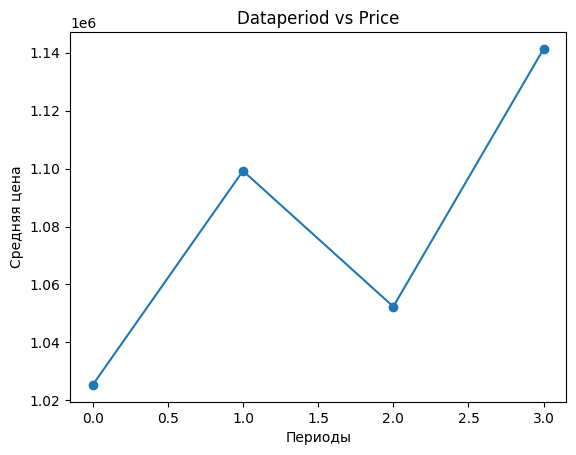

In [ ]:
Price_mean = np.array(df.groupby(['Dataperiod'])['Price'].mean())
Periods_nums = np.arange(iter)

plt.plot(Periods_nums, Price_mean, marker='o')

plt.title("Dataperiod vs Price")
plt.xlabel("Периоды")
plt.ylabel("Средняя цена")

plt.show()

Можно заметить что тенденция с течением времени идёт на рост цен

Несмотря на то, что в датасете всего 4 периода (2 неполных года), можно сделать следующие выводы

В 0 период было куплено всего 2251 объект недвижимости, после роста цен на 10% в следующем периоде было куплено 4085 объектов, это можно объяснить, что люди начали экстренно скупать недвижимость, опасаясь дальнейшего роста. В период самых низких цен было куплено больше всего объектов, а когда цена пробила новый потолок, то объектов было куплено меньше всего.

По итогу этот признак можно посчитать полезным чтобы качественно предсказывать цены

Оставим новый созданный признак Dataperiod и удалим признак Date



In [ ]:
df.drop(['Date'], axis=1, inplace=True)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,1
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,0
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,2
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,2
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,Barry,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0,3
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0,3
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0,3


Просто удалим 62 записи, которые содержат Nan значения в признаке Car, которые составляют 0,46 процентов от всех записей

In [ ]:
index_value = df.index[df['Car'].isnull()].tolist()

In [ ]:
df.drop(index_value, inplace=True)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,1
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,0
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,2
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,2
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,Barry,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0,3
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0,3
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0,3


Поробуем заполнить другие пропущенные значения в признаках BuildingArea и YearBuilt

Предпопологаю, что BuildingArea может зависить от Room, Bedroom2, Bathroom, Type

Но перед этим трансформируем признак Type из строки в число

In [ ]:
df['Type'].value_counts()

,count
Type,
h,9389
u,3015
t,1114


In [ ]:
df['Type'].replace(['h', 'u', 't'], [0, 1, 2], inplace=True)

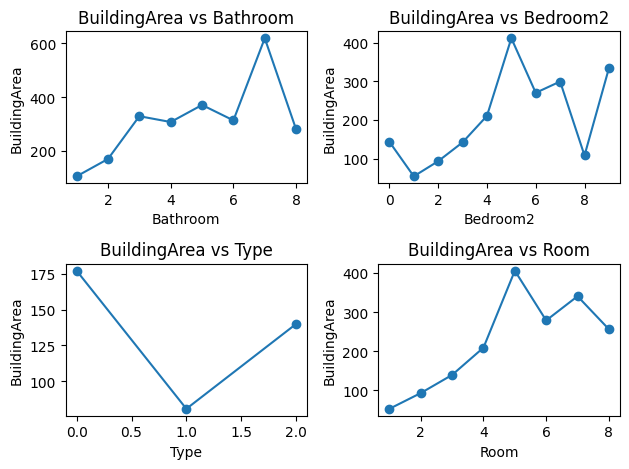

In [ ]:
BuildingArea_mean_Bathroom = np.array(df.groupby(['Bathroom'])['BuildingArea'].mean())
Bathroom_nums = np.sort(np.array(df['Bathroom'].unique()))

BuildingArea_mean_Bedroom2 = np.array(df.groupby(['Bedroom2'])['BuildingArea'].mean())
Bedroom2_nums = np.sort(np.array(df['Bedroom2'].unique()))

BuildingArea_mean_Type = np.array(df.groupby(['Type'])['BuildingArea'].mean())
Type_nums = np.sort(np.array(df['Type'].unique()))

BuildingArea_mean_Room = np.array(df.groupby(['Rooms'])['BuildingArea'].mean())
Room_nums = np.sort(np.array(df['Rooms'].unique()))

plt.subplot(2, 2, 1)
plt.plot(Bathroom_nums, BuildingArea_mean_Bathroom, marker='o')
plt.xlabel("Bathroom")
plt.ylabel("BuildingArea")
plt.title('BuildingArea vs Bathroom')

plt.subplot(2, 2, 2)
plt.plot(Bedroom2_nums, BuildingArea_mean_Bedroom2, marker='o')
plt.xlabel("Bedroom2")
plt.ylabel("BuildingArea")
plt.title('BuildingArea vs Bedroom2')

plt.subplot(2, 2, 3)
plt.plot(Type_nums, BuildingArea_mean_Type, marker='o')
plt.xlabel("Type")
plt.ylabel("BuildingArea")
plt.title('BuildingArea vs Type')

plt.subplot(2, 2, 4)
plt.plot(Room_nums, BuildingArea_mean_Room, marker='o')
plt.xlabel("Room")
plt.ylabel("BuildingArea")
plt.title('BuildingArea vs Room')

plt.tight_layout()
plt.show()

По графикам можно сделать вывод, что существует некоторая зависимость от количества ванных комнат и просто комнат

И очень слабая и неявная от количества спален

Но есть объяснимая зависимость от типа здания

Если здание h (дом, коттедж, вилла), то его средняя площадь 175, если здания типа u (блок, дуплекс), то его средняя площадь меньше 100, а если здание типа t (таунхаус), то его средняя площадь равна 140.

In [ ]:
df['Bathroom'].value_counts()

,count
Bathroom,
1.0,7467
2.0,4958
3.0,916
4.0,106
0.0,34
5.0,28
6.0,5
7.0,2
8.0,2


In [ ]:
df['Rooms'].value_counts()

,count
Rooms,
3,5852
2,3622
4,2684
1,678
5,596
6,67
7,10
8,8
10,1


У нас есть данные с количесвом Bathroom 6, 7 и 8

Таких объектов 5+2+2 = 9

И так же один объект с количеством Rooms 10

Просто избавимся от них как от выбросов

И будем рассчитывать BuildingArea используя среднюю по трём величинам признаков Type, Bathroom и Rooms

In [ ]:
ind = df[(df['Bathroom'] == 6) | (df['Bathroom'] == 7) | (df['Bathroom'] == 8)].index.tolist()
df.drop(ind, inplace=True)

ind = df[(df['Rooms'] == 10)].index.tolist()
df.drop(ind, inplace=True)

df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,0,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,1
1,Abbotsford,2,0,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,0
2,Abbotsford,3,0,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,2
3,Abbotsford,3,0,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,2
4,Abbotsford,4,0,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,0,1245000.0,S,Barry,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,0,1031000.0,SP,Williams,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0,3
13577,Williamstown,3,0,1170000.0,S,Raine,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0,3
13578,Williamstown,4,0,2500000.0,PI,Sweeney,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0,3


In [ ]:
arr1 = df.groupby(['Bathroom'])['BuildingArea'].mean().tolist()
arr1

[nan, 105.9500, 170.2297, 328.9372, 307.3080, 370.5150]

In [ ]:
arr2 = df.groupby(['Rooms'])['BuildingArea'].mean().tolist()
arr2

[52.5396, 92.8319, 139.1402, 208.9412, 405.9866, 276.0429, 340.4233, 135.3333]

In [ ]:
arr1 = np.nan_to_num(arr1, nan=0)

In [ ]:
for i in range(3):
  for j in range(6):
    for k in range(8):
      df.loc[(df['Type'] == i) & (df['Bathroom'] == j) & (df['Rooms'] == k),'BuildingArea'] = (BuildingArea_mean_Type[i] + arr1[j] + arr2[k])/3
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,0,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,140.774280,NaN,Northern Metropolitan,4019.0,1
1,Abbotsford,2,0,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,140.774280,1900.0,Northern Metropolitan,4019.0,0
2,Abbotsford,3,0,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,185.467836,1900.0,Northern Metropolitan,4019.0,2
3,Abbotsford,3,0,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,185.467836,NaN,Northern Metropolitan,4019.0,2
4,Abbotsford,4,0,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,229.723077,2014.0,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,0,1245000.0,S,Barry,16.7,4.0,2.0,2.0,652.0,251.149634,1981.0,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,0,1031000.0,SP,Williams,6.8,3.0,2.0,2.0,333.0,185.467836,1995.0,Western Metropolitan,6380.0,3
13577,Williamstown,3,0,1170000.0,S,Raine,6.8,3.0,2.0,4.0,436.0,185.467836,1997.0,Western Metropolitan,6380.0,3
13578,Williamstown,4,0,2500000.0,PI,Sweeney,6.8,4.0,1.0,5.0,866.0,229.723077,1920.0,Western Metropolitan,6380.0,3


Для того чтобы заполнить признак YearBuilt нужно определиться влияет ли год постройки здания на Price

Для этого создадим новый признак Yearperiod по значениям 25%, 50%, 75% для признака YearBuilt

In [ ]:
df.describe()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Dataperiod
count,13508.000000,13508.000000,1.350800e+04,13508.000000,13508.000000,13508.000000,13508.000000,13508.000000,13505.000000,8168.000000,13508.000000,13508.000000
mean,2.937741,0.388140,1.073768e+06,10.156818,2.913311,1.531833,1.608528,557.936038,175.376554,1964.900955,7455.330545,1.515472
std,0.951969,0.634395,6.372681e+05,5.861721,0.958821,0.679329,0.960303,3999.651482,53.320173,37.124844,4381.929526,0.940117
min,1.000000,0.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,57.856486,1196.000000,249.000000,0.000000
25%,2.000000,0.000000,6.500000e+05,6.200000,2.000000,1.000000,1.000000,178.000000,140.774280,1940.000000,4380.000000,1.000000
50%,3.000000,0.000000,9.007500e+05,9.200000,3.000000,1.000000,2.000000,442.000000,164.041280,1970.000000,6567.000000,2.000000
75%,3.000000,1.000000,1.327125e+06,13.000000,3.000000,2.000000,2.000000,651.000000,207.835059,1999.000000,10331.000000,2.000000
max,8.000000,2.000000,9.000000e+06,48.100000,20.000000,5.000000,10.000000,433014.000000,317.911396,2018.000000,21650.000000,3.000000


In [ ]:
df['Yearperiod'] = np.NaN
df.loc[(df['YearBuilt'] <= 1940),'Yearperiod'] = 0
df.loc[(df['YearBuilt'] > 1940) & (df['YearBuilt'] <= 1970),'Yearperiod'] = 1
df.loc[(df['YearBuilt'] > 1970) & (df['YearBuilt'] <= 1999),'Yearperiod'] = 2
df.loc[df['YearBuilt'] > 1999,'Yearperiod'] = 3

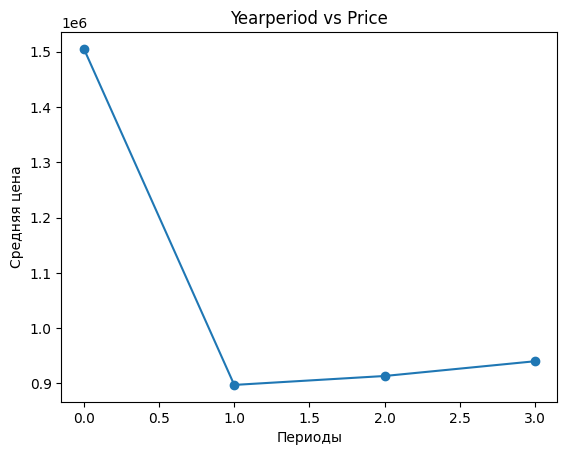

In [ ]:
Price_mean = np.array(df.groupby(['Yearperiod'])['Price'].mean())
Periods_nums = np.arange(4)

plt.plot(Periods_nums, Price_mean, marker='o')

plt.title("Yearperiod vs Price")
plt.xlabel("Периоды")
plt.ylabel("Средняя цена")

plt.show()

Заметно, что здания построенные до 1940 года обладают стоимостью в два раза превышающюю современные здания, и дальше чем новее здание, тем дороже оно стоит.

Поэтому стоит попытаться заполнить этот признак

Предполагаю, что есть районы или пригорды, где эти здания преимуществно находяться

In [ ]:
df[(df['Yearperiod'] == 0)]['Regionname'].value_counts()

,count
Regionname,
Southern Metropolitan,894
Northern Metropolitan,686
Western Metropolitan,410
Eastern Metropolitan,58
South-Eastern Metropolitan,7
Northern Victoria,2
Eastern Victoria,1


Больше всего старые здания находятся в SM, NM и WM

<Axes: xlabel='count', ylabel='Regionname'>

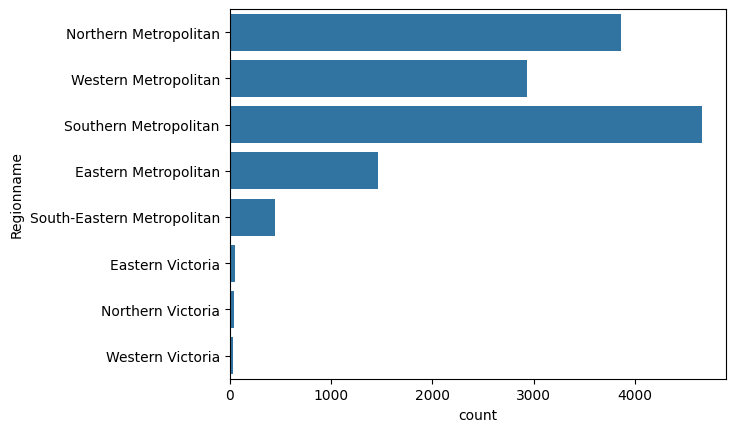

In [ ]:
sns.countplot(df['Regionname'])

Но на самом деле в целом в этих районах было совершенно больше всего покупок


In [ ]:
df2 = df[(df['Suburb'] == 'Brunswick') | (df['Suburb'] == 'Richmond') | (df['Suburb'] == 'Northcote') | (df['Suburb'] == 'Coburg')]

<Axes: xlabel='Yearperiod', ylabel='count'>

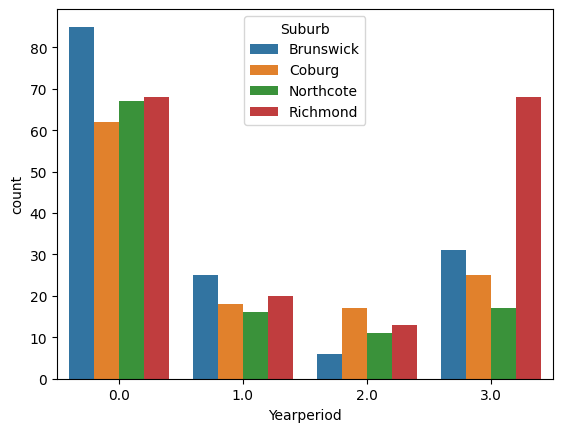

In [ ]:
sns.countplot(x ='Yearperiod', hue='Suburb', data=df2)

Самый многочисленный по старым зданиям район, так же содержит и обычные здания в соотношении 50 на 50, то есть он является смешенным и нет ярко выделенного пригорода, где продавались только старые здания

Район или пригород выделить не получилось

Попробуем найти агента, который продавал больше всего старых зданий

In [ ]:
df2 = df[(df['SellerG'] == 'Nelson') | (df['SellerG'] == 'Jellis') | (df['SellerG'] == 'Marshall') | (df['SellerG'] == 'hockingstuart')]

<Axes: xlabel='Yearperiod', ylabel='count'>

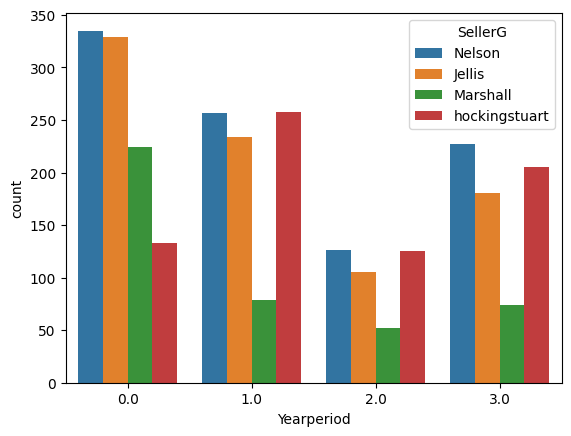

In [ ]:
sns.countplot(x ='Yearperiod', hue='SellerG', data=df2)

Схожая ситуация, больше всего старых домов продавали агенты, которые в целом продали больше всех

Хотя агент Marshal и выделяется на фоне остальных агентов, но он не специализируется на продаже только старых зданий

Поверим методы продажи

<Axes: xlabel='Yearperiod', ylabel='count'>

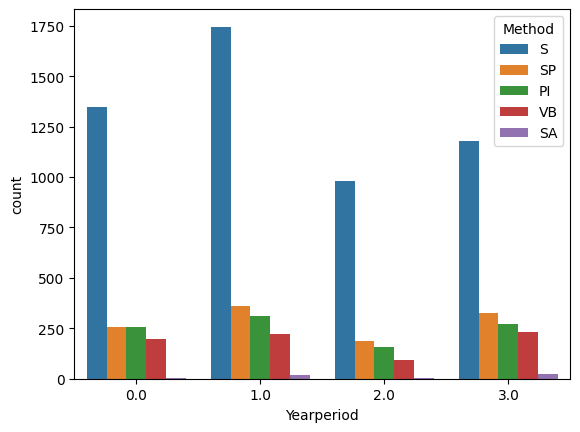

In [ ]:
sns.countplot(x ='Yearperiod', hue='Method', data=df)

In [ ]:
df['Yearperiod'].value_counts()

,count
Yearperiod,
1.0,2658
0.0,2058
3.0,2033
2.0,1419


Метод продажи ничего не даёт

Независимо от возраста здания все они продавались самым распрастранённым методом S

Идей для дальнейшего анализа не осталось. По этому есть три варианта решения:


*   Избавиться от строчек в которых пропущенно значение и тогда исчезнет полованиа датасета
*   Избавиться от признака YearBuilt
*   Либо заполнить пропущенные значения средним числом, что может помешать обучению и дать ложную информацию

Я решаю избавиться от признака, так как он в целом существенен только для старых зданий, процент которых составляет 25 от всего датасета, а оставшиеся 75% изменяются в цене от признака YearBuilt не так сильно

Так же удалим признаки, которые нам тоже уже не нужны SellerG, Method и созданный признак Yearperiod


In [ ]:
df.drop(['SellerG','Method','Yearperiod','YearBuilt'], axis=1, inplace=True)
df

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,0,1480000.0,2.5,2.0,1.0,1.0,202.0,140.774280,Northern Metropolitan,4019.0,1
1,Abbotsford,2,0,1035000.0,2.5,2.0,1.0,0.0,156.0,140.774280,Northern Metropolitan,4019.0,0
2,Abbotsford,3,0,1465000.0,2.5,3.0,2.0,0.0,134.0,185.467836,Northern Metropolitan,4019.0,2
3,Abbotsford,3,0,850000.0,2.5,3.0,2.0,1.0,94.0,185.467836,Northern Metropolitan,4019.0,2
4,Abbotsford,4,0,1600000.0,2.5,3.0,1.0,2.0,120.0,229.723077,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,0,1245000.0,16.7,4.0,2.0,2.0,652.0,251.149634,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,0,1031000.0,6.8,3.0,2.0,2.0,333.0,185.467836,Western Metropolitan,6380.0,3
13577,Williamstown,3,0,1170000.0,6.8,3.0,2.0,4.0,436.0,185.467836,Western Metropolitan,6380.0,3
13578,Williamstown,4,0,2500000.0,6.8,4.0,1.0,5.0,866.0,229.723077,Western Metropolitan,6380.0,3


Рассмотрим матрицу корреляций

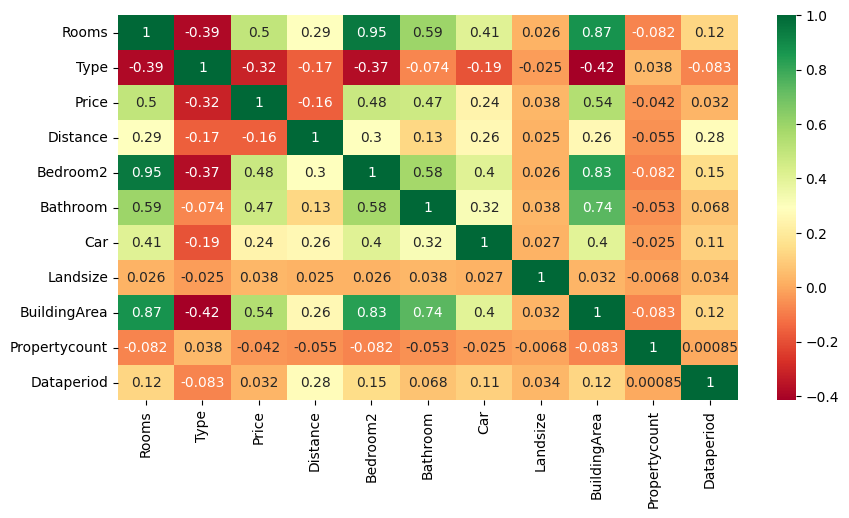

In [ ]:
df_numeric = df.select_dtypes(include=[float, int])

sns.heatmap(df_numeric.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

У нас есть 2 нецелевых признака, которые очень сильно коллерируют между собой, избавимся от одного из них.

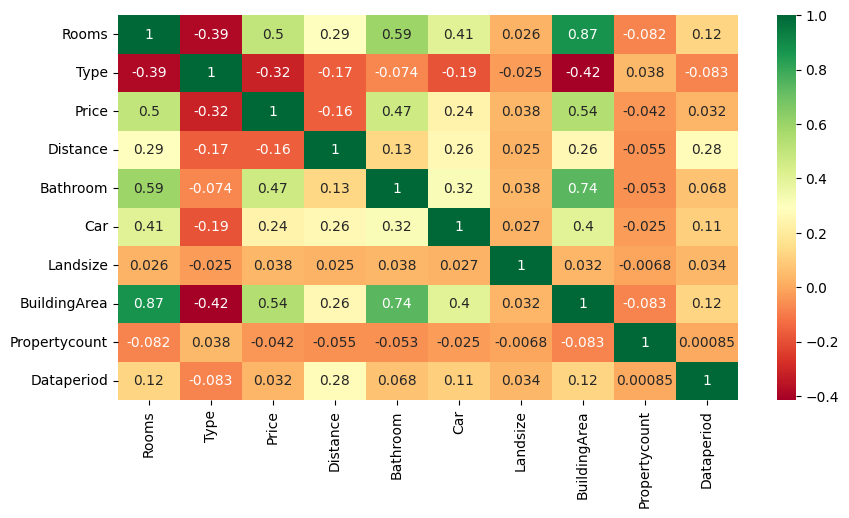

In [ ]:
df.drop(['Bedroom2'], axis=1, inplace=True)

df_numeric = df.select_dtypes(include=[float, int])

sns.heatmap(df_numeric.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

С целевым признаком Price коллерует довольно много признаков

Тут можно исследовать полученные положительные и отрицательные корреляции между признаками. Далее уже необходимо выбирать семейства моделей машинного обучения для решения задачи регрессии.
